In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bcn_orginal = pd.read_csv('../data/listings_bcn.csv')
scraped = pd.read_csv('../data/airbnb.csv')

In [3]:
bcn_orginal.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13977576,https://www.airbnb.com/rooms/13977576,20230314070701,2023-03-14,previous scrape,Habitación individual es Barcelona,Mi alojamiento es bueno para aventureros y via...,NaN,https://a0.muscache.com/pictures/7a6e9767-bd4e...,64903899,...,NaN,NaN,NaN,NaN,f,1,0,1,0,0.01
1,42105584,https://www.airbnb.com/rooms/42105584,20230314070701,2023-03-14,previous scrape,Habitación M&D,<b>License number</b><br />Exempt,NaN,https://a0.muscache.com/pictures/7342e586-6ea5...,333969184,...,NaN,NaN,NaN,Exempt,f,1,0,1,0,NaN
2,33727898,https://www.airbnb.com/rooms/33727898,20230314070701,2023-03-14,city scrape,Spacious and bright apartment next to Plaza Es...,Hi friends! Welcome to this apartment located ...,The apartment is located in the Eixample quart...,https://a0.muscache.com/pictures/44066458-5997...,251710733,...,5.00,4.83,4.73,HUTB-008684,f,4,4,0,0,0.63
3,44995311,https://www.airbnb.com/rooms/44995311,20230314070701,2023-03-14,city scrape,"Single Room, City Center, Private Bathroom",Goya Hostel is a hostel located in the center ...,"The Eixample, which translates as ""widening"" b...",https://a0.muscache.com/pictures/af651bc2-8dff...,363074093,...,4.64,4.91,4.73,HUTB-265656,t,7,1,6,0,0.69
4,15763812,https://www.airbnb.com/rooms/15763812,20230314070701,2023-03-14,city scrape,HABITACIÓN PLAZA ESPAÑA,"Lugares de interés: Poble Espanyol, CaixaForum...",NaN,https://a0.muscache.com/pictures/1bccbbbc-4b78...,101927904,...,4.67,4.88,4.60,Exempt,t,1,0,1,0,0.93


In [5]:
scraped.tail(200)

,Unnamed: 0,url,host_type
11615,11615,https://www.airbnb.com/rooms/51060171,commercial
11616,11616,https://www.airbnb.com/rooms/30883381,commercial
11617,11617,https://www.airbnb.com/rooms/29810948,commercial
11618,11618,https://www.airbnb.com/rooms/1996319,commercial
11619,11619,https://www.airbnb.com/rooms/43473897,commercial
...,...,...,...
11810,11810,https://www.airbnb.com/rooms/50514057,commercial
11811,11811,https://www.airbnb.com/rooms/20217450,commercial
11812,11812,https://www.airbnb.com/rooms/7634833,commercial
11813,11813,https://www.airbnb.com/rooms/3036626,commercial


In [4]:
bcn_orginal.shape

(15655, 75)

In [5]:
bcn_orginal.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
bcn_orginal['host_id'].nunique()

6227

In [7]:
bcn_orginal['host_name'].nunique()

3076

In [8]:
bcn_orginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15655 entries, 0 to 15654
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15655 non-null  int64  
 1   listing_url                                   15655 non-null  object 
 2   scrape_id                                     15655 non-null  int64  
 3   last_scraped                                  15655 non-null  object 
 4   source                                        15655 non-null  object 
 5   name                                          15646 non-null  object 
 6   description                                   15569 non-null  object 
 7   neighborhood_overview                         9204 non-null   object 
 8   picture_url                                   15655 non-null  object 
 9   host_id                                       15655 non-null 

In [9]:
bcn_orginal.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.565500e+04,1.565500e+04,1.565500e+04,15653.000000,15653.000000,15655.000000,15655.000000,15655.000000,0.0,15098.000000,...,12089.000000,12084.000000,12090.000000,12084.000000,12085.000000,15655.000000,15655.000000,15655.000000,15655.000000,12176.000000
mean,1.823385e+17,2.023031e+13,1.450517e+08,33.219575,47.700569,41.391943,2.167214,3.484510,NaN,1.758511,...,4.581542,4.709420,4.709391,4.747661,4.467860,24.163462,21.142510,2.856404,0.084063,1.299759
std,3.126641e+17,0.000000e+00,1.555632e+08,75.886992,122.550600,0.013936,0.017259,2.172102,NaN,1.051358,...,0.518338,0.456223,0.467022,0.371416,0.537626,46.168220,45.881018,11.617766,0.789422,1.747771
min,1.867400e+04,2.023031e+13,3.073000e+03,1.000000,1.000000,41.352608,2.091590,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.891816e+07,2.023031e+13,9.171437e+06,1.000000,2.000000,41.381040,2.157340,2.000000,NaN,1.000000,...,4.440000,4.640000,4.630000,4.670000,4.310000,1.000000,0.000000,0.000000,0.000000,0.210000
50%,3.864140e+07,2.023031e+13,7.067177e+07,6.000000,8.000000,41.389740,2.168246,3.000000,NaN,1.000000,...,4.720000,4.850000,4.850000,4.850000,4.580000,5.000000,2.000000,0.000000,0.000000,0.770000
75%,5.563748e+17,2.023031e+13,2.651478e+08,28.000000,39.000000,41.401295,2.177460,4.000000,NaN,2.000000,...,4.920000,5.000000,5.000000,5.000000,4.790000,23.000000,19.000000,1.000000,0.000000,1.900000
max,8.462300e+17,2.023031e+13,5.049885e+08,1817.000000,3639.000000,41.459560,2.227710,16.000000,NaN,20.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,241.000000,241.000000,120.000000,12.000000,47.160000


In [10]:
bcn_orginal.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3479
Length: 75, dtype: int64

In [11]:
bcn_orginal['neighbourhood_cleansed'].unique()

array(['Hostafrancs', 'la Prosperitat', 'Sant Antoni',
       "la Dreta de l'Eixample", 'el Poble Sec', 'el Poblenou',
       "l'Antiga Esquerra de l'Eixample", 'el Raval',
       "el Camp de l'Arpa del Clot", 'Navas', 'la Vila de Gràcia',
       'el Baix Guinardó', "la Nova Esquerra de l'Eixample", 'les Corts',
       'Sant Gervasi - Galvany', 'la Barceloneta',
       'Sant Pere, Santa Caterina i la Ribera', 'el Barri Gòtic',
       'el Putxet i el Farró', 'el Fort Pienc', 'la Sagrada Família',
       'Sants - Badal', 'el Parc i la Llacuna del Poblenou',
       'les Tres Torres', 'Sants', 'el Guinardó',
       'Vilapicina i la Torre Llobeta', 'Pedralbes',
       'Sant Martí de Provençals', "el Camp d'en Grassot i Gràcia Nova",
       'Sarrià', 'la Vila Olímpica del Poblenou', 'Can Baró',
       'la Teixonera', 'la Salut', 'Horta', 'la Marina del Prat Vermell',
       'Sant Genís dels Agudells', 'el Carmel',
       'Diagonal Mar i el Front Marítim del Poblenou', 'la Bordeta',
       'S

In [12]:
bcn_orginal['neighbourhood_group_cleansed'].unique()

array(['Sants-Montjuïc', 'Nou Barris', 'Eixample', 'Sant Martí',
       'Ciutat Vella', 'Sant Andreu', 'Gràcia', 'Horta-Guinardó',
       'Les Corts', 'Sarrià-Sant Gervasi'], dtype=object)

In [13]:
bcn_orginal['neighbourhood_group_cleansed'].value_counts(normalize=True).sort_values(ascending=False)

neighbourhood_group_cleansed
Eixample               0.363526
Ciutat Vella           0.235516
Sants-Montjuïc         0.102012
Sant Martí             0.091408
Gràcia                 0.090003
Sarrià-Sant Gervasi    0.045353
Horta-Guinardó         0.028234
Les Corts              0.019994
Sant Andreu            0.012264
Nou Barris             0.011690
Name: proportion, dtype: float64

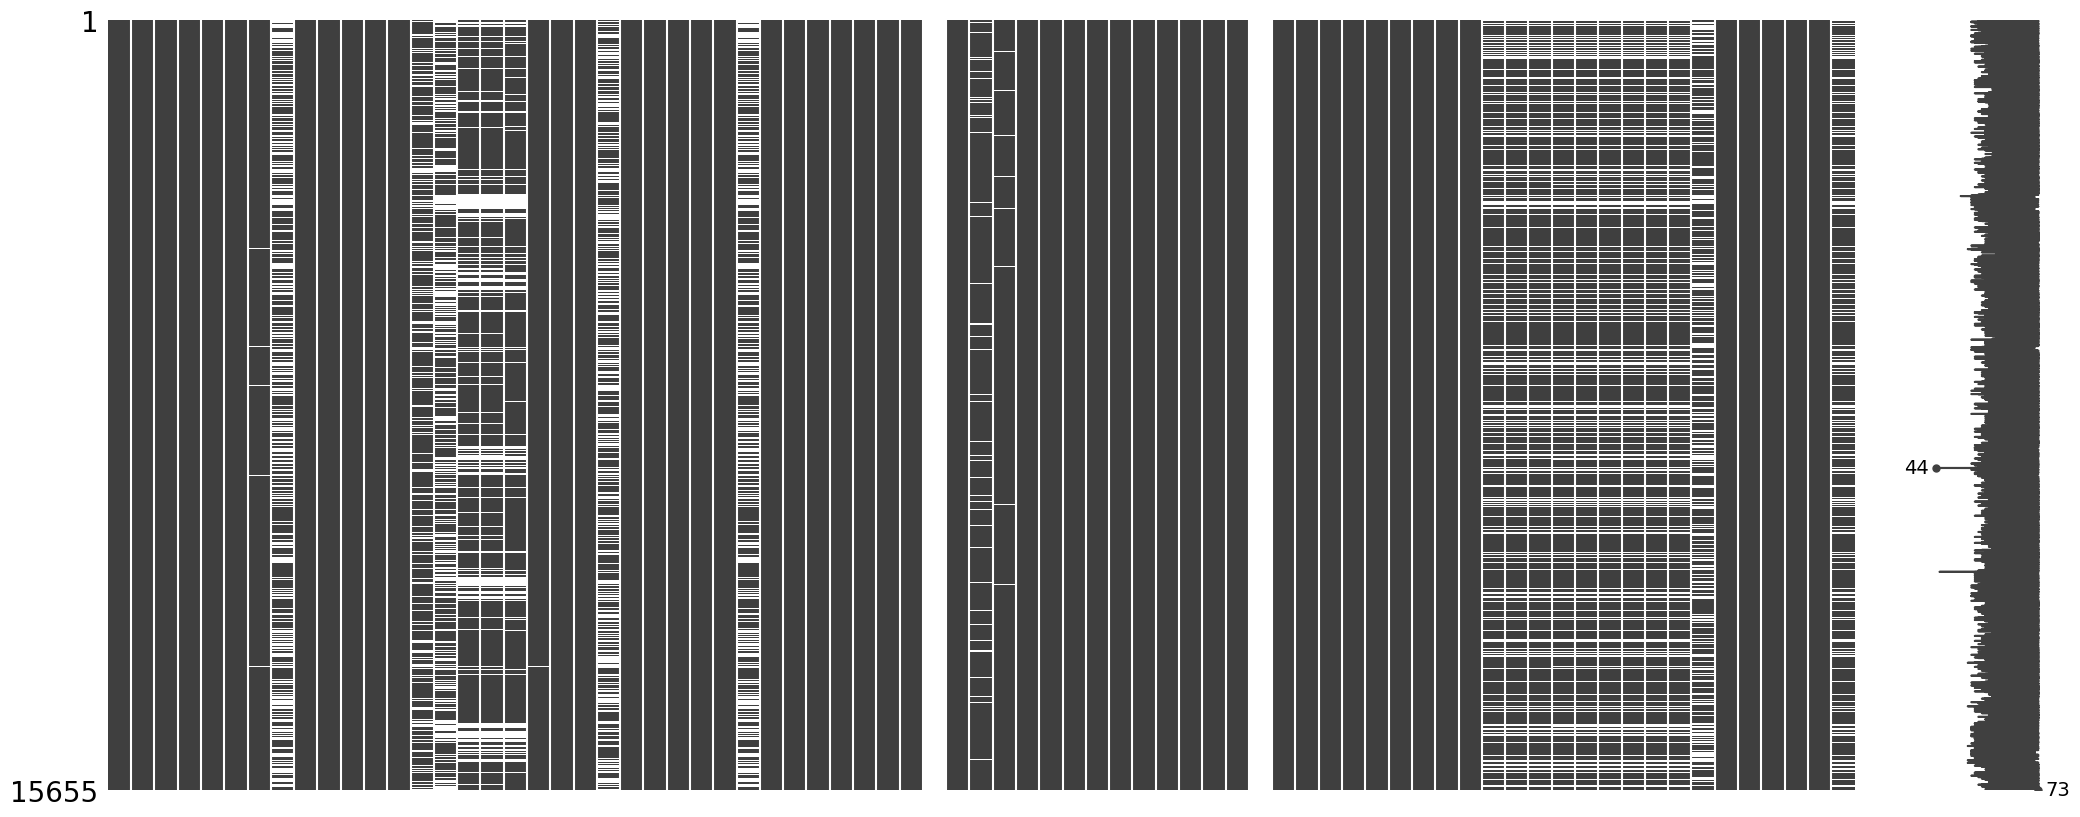

In [14]:
import missingno as msno
msno.matrix(bcn_orginal);

In [15]:
bcn_orginal['license'].isnull().sum()

4813

In [16]:
bcn_orginal['license'].duplicated()

0        False
1        False
2        False
3        False
4         True
         ...  
15650    False
15651     True
15652    False
15653    False
15654     True
Name: license, Length: 15655, dtype: bool

In [134]:
duplicate_license = bcn_orginal[bcn_orginal.duplicated('license', keep=False)]
duplicate_license = duplicate_license['license'].unique()

In [137]:
duplicate_license

array([nan, 'Exempt', 'HUTB-265656', 'HUTB-008725', 'HUTB-000607',
       'HUTB-123456', 'HB-004084', 'HUTB-008594', 'HB-004465',
       'HUTB-002346', 'HUTB-009985', 'HUTB-007140', 'HUTB-006384',
       'HUTB-000441', 'HB-003947', 'HUTB-008597', 'AJ-000614',
       'HUTB-004847', 'HUTB-000447', 'HUTB-002085', 'AJ000593',
       'HUTB-000114', 'HUTB-003898', 'HB-002395', 'HUTB-011329',
       'HUTB-003783', 'HUTB-011643', 'HUTB-011276', 'HB-003960',
       'HUTB009114', 'HUTB-001921', 'HUTB-006662', 'HUTB-005898',
       'HUTB-002103', 'HB-002211', 'HUTB-009674', 'HUTB-007362',
       'HB-004666', 'HB-004515', 'HUTB-003622', 'HB-002279', 'HB-004571',
       'HUTB-008254', 'HB-004535', 'HUTB-007296', 'HB-004715', 'AJ000621',
       'HB004232', 'AJ-000539', 'HB-004625', 'HB-000087', 'HUTB-011320',
       'HUTB-014065', 'HUTB-004782', 'HB-004232', 'HB-004622',
       'HUTB-004660', 'HUTB-002584', 'HB-004564',
       'No need for long term renting.', 'HUTB-008081', 'HUTB-010325',
       'H

In [18]:
duplicate_license.loc[duplicate_license['license'] == 'HB004716']

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
10207,52109726,https://www.airbnb.com/rooms/52109726,20230314070701,2023-03-14,city scrape,Triple Room close Camp Nou,Equipped with a double bed (160 cm X 200 cm) a...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,421864869,...,4.80,3.80,4.80,HB004716,t,5,0,5,0,0.63
12469,52109479,https://www.airbnb.com/rooms/52109479,20230314070701,2023-03-14,city scrape,Habitación Doble con terraza,The room has a double bed (160 cm X 200 cm) or...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,421864869,...,4.83,4.33,4.58,HB004716,t,5,0,5,0,2.92
13107,52110035,https://www.airbnb.com/rooms/52110035,20230314070701,2023-03-14,city scrape,Habitación Doble Superior cerca Camp Nou,It can have a double bed (160 cm X 200 cm) or ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,421864869,...,4.92,4.58,4.79,HB004716,t,5,0,5,0,1.64
13108,52109928,https://www.airbnb.com/rooms/52109928,20230314070701,2023-03-14,city scrape,Junior Suite cerca Camp Nou,It is equipped with a double bed (160 cm X 200...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,421864869,...,5.00,5.00,5.00,HB004716,t,5,0,5,0,0.06
14159,52108241,https://www.airbnb.com/rooms/52108241,20230314070701,2023-03-14,city scrape,Double Room Close Camp Nou,"With about 15 m2, it has an excellent location...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,421864869,...,4.80,4.36,4.66,HB004716,t,5,0,5,0,6.67


In [19]:
bcn_orginal.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [20]:
bcn = bcn_orginal.drop(['scrape_id', 'last_scraped', 'source', 'description', 'neighborhood_overview', 'picture_url', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'calendar_last_scraped'], axis=1)

In [21]:
bcn.columns

Index(['id', 'listing_url', 'name', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_revi

EDA ON HOSTS

In [130]:
hosts = bcn.groupby(['host_id', 'host_name', 'host_is_superhost', 'host_since', 'host_location', 'host_neighbourhood', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'instant_bookable']).agg(listings = ('id', 'count'), licenses = ('license', 'count'))

In [131]:
hosts.sort_values(by='listings', ascending=False)

,,,,,,,,,,,listings,licenses
host_id,host_name,host_is_superhost,host_since,host_location,host_neighbourhood,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,instant_bookable,,
32037490,SweetInn,f,2015-04-27,"Barcelona, Spain",Dreta de l'Eixample,within an hour,100%,99%,f,t,179,179
4459553,AB Apartment,f,2012-12-21,"Barcelona, Spain",L'Antiga Esquerra de l'Eixample,within an hour,100%,94%,f,f,173,173
299462,Stay U-Nique,f,2010-11-26,"Barcelona, Spain",Vila de Gràcia,within an hour,99%,100%,f,t,128,125
1447144,Acomodis Apartments,f,2011-11-27,"Barcelona, Spain",El Poble-sec,within a day,50%,6%,f,f,123,84
1391607,Aline I Andrea,f,2011-11-10,"Barcelona, Spain",el Fort Pienc,within a few hours,98%,98%,f,f,121,114
...,...,...,...,...,...,...,...,...,...,...,...,...
4814567,Jose Manuel,f,2013-01-23,"Barcelona, Spain",el Fort Pienc,within an hour,100%,99%,f,f,1,1
4778919,Yanet,f,2013-01-20,"Barcelona, Spain",La Barceloneta,within a day,70%,72%,f,f,1,0
21558846,Andreu,t,2014-09-20,"Barcelona, Spain",Sants-Montjuïc,within an hour,100%,100%,t,t,1,1


In [119]:
bcn['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)